In [10]:
!apt-get update -y
!apt-get install -y tesseract-ocr ffmpeg
!pip install --upgrade openai pytesseract pillow SpeechRecognition gTTS pydub opencv-python-headless

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 388 kB in 1s (320 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does

In [11]:
from getpass import getpass
from IPython.display import display, Image, Audio, Markdown, clear_output
import pytesseract
from PIL import Image as PILImage, ImageOps
import cv2
import numpy as np

# No longer initializing OpenAI client as it's not used in subsequent cells

# display(Markdown("**OpenAI client ready ✅** — keep your key private.")) # Removed

Enter your OpenAI API key (starts with sk-): ··········


**OpenAI client ready ✅** — keep your key private.

In [12]:
def preprocess_image_for_ocr(image_path):
    # load image with OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Could not read image. Check file path or upload.")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # increase contrast / remove noise by adaptive threshold
    th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
    # save a temp processed image
    proc_path = "/tmp/processed_ocr.png"
    cv2.imwrite(proc_path, th)
    return proc_path

def extract_text_from_image(image_path):
    # Preprocess then run pytesseract
    proc = preprocess_image_for_ocr(image_path)
    img = PILImage.open(proc)
    text = pytesseract.image_to_string(img)
    # small cleanup
    text = text.strip()
    return text

Saving text para1.jpg to text para1 (1).jpg


**Uploaded:** text para1 (1).jpg

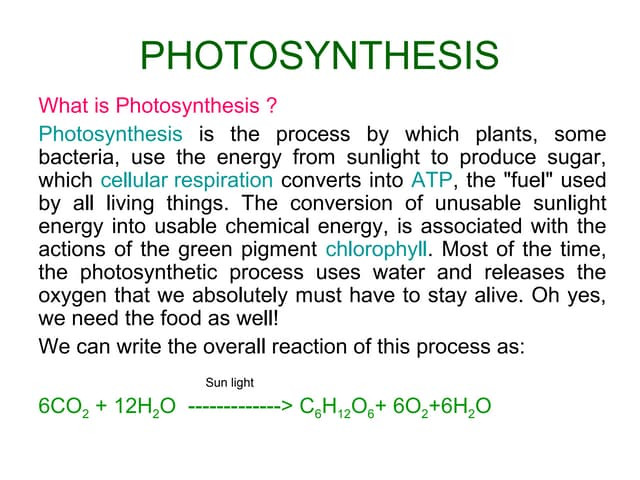

In [13]:
from google.colab import files
uploaded = files.upload()   # choose a file from your device

# get the uploaded filename (if you uploaded one)
filename = next(iter(uploaded))  # first uploaded file name
display(Markdown("**Uploaded:** " + filename))
display(Image(filename))         # show the original image

In [14]:
extracted_text = extract_text_from_image(filename)
display(Markdown("### 📖 Extracted Text:"))
print(extracted_text if extracted_text else "(No text found — try a clearer photo)")

### 📖 Extracted Text:

PHOTOSYNTHESIS

What is: Photosynthesis?”

Photosynthesis”: is ‘the: -process_ by, ‘which: iplants;. some
bacteria; ‘use. the, energy*from sunlight! to produce ‘sugar;
‘which-cellular respiration converts:into:ATP,.the “fuel’ used
by. all living-“things.: The’ ‘conve cof unusable “stinlight
energy into usable chemical energy,-is' “associated ‘with the
*actions-of thé“ gréen pigmént chlorophyll: Most of the timé,
the: phétosynthetic‘process ‘uses ‘water ‘arid ‘reledses: the
oxygen that‘we absolutely must have: to’stay/alive.:Oh yes,
we need the food.as: welll”

We.cah write. the overall Téaction of this process’as:

  
 

 

in fight

ome > C,H ,Ogt 60,46H,0

 

:6CO;+12H,0 +


In [16]:
!pip install google-generativeai

In [17]:
import google.generativeai as genai
from getpass import getpass

# Enter API key in a hidden box
GEMINI_API_KEY = getpass("Enter your Gemini API Key: ")
genai.configure(api_key=GEMINI_API_KEY)


Enter your Gemini API Key: ··········


In [18]:
def explain_text_with_gemini(text, target_age="10", language="english"):
    prompt = f"Explain the following in very simple {language}, like you're teaching a {target_age}-year-old student:\n\n{text}"

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)

    return response.text.strip()


In [19]:
if extracted_text:
    ai_explanation = explain_text_with_gemini(extracted_text, target_age="10", language="english")
    display(Markdown("### 🤖 AI Explanation (Gemini):"))
    print(ai_explanation)
else:
    print("No extracted text to explain.")


### 🤖 AI Explanation (Gemini):

Imagine plants are like tiny solar-powered food factories.  Photosynthesis is the process they use to make their food.

They take in sunlight, water from the ground, and air (which has carbon dioxide in it).  Using the sunlight's energy, they mix these things together to make sugar.  This sugar is their food!  They use this food to grow bigger and stronger, just like we use the food we eat.

As a byproduct (something extra they make), they let out oxygen, which is the air we breathe.  So, plants are making food for themselves *and* giving us the air we need to live!

The simple way to show this is:

Sunlight + Water + Carbon Dioxide  ---> Sugar + Oxygen

The plants use the sugar (like our food) to get energy to live.  The oxygen is something left over that we get to breathe.


In [20]:
# pip install gTTS # Removed as it's installed in the first cell

from gtts import gTTS
from IPython.display import Audio

if extracted_text:
    # Convert AI explanation to speech
    tts = gTTS(ai_explanation, lang="en")
    tts.save("explanation.mp3")

    display(Markdown("### 🔊 Voice Output:"))
    display(Audio("explanation.mp3", autoplay=True))

### 🔊 Voice Output:

In [21]:
def quiz_from_text(text):
    prompt = f"Create 3 simple quiz questions with answers from this text:\n\n{text}"
    response = genai.GenerativeModel("gemini-1.5-flash").generate_content(prompt)
    return response.text.strip()

quiz = quiz_from_text(extracted_text)
display(Markdown("### 📝 Quiz from Text:"))
print(quiz)


### 📝 Quiz from Text:

Here are 3 simple quiz questions with answers based on the provided text:

**Question 1:** What is photosynthesis?

**Answer:** Photosynthesis is the process by which plants and some bacteria use the energy from sunlight to produce sugar, which is converted into ATP (fuel for living things).


**Question 2:** What is the green pigment involved in photosynthesis?

**Answer:** Chlorophyll


**Question 3:** What does photosynthesis produce that we need to survive?

**Answer:** Oxygen (and food/sugar)


In [23]:
def explain_text_with_gemini(text, target_age="10", language="english", detail_level="simple explanation"):
    """Explains text using Gemini with customizable age, language, and detail."""
    prompt = f"Explain the following in very simple {language}, like you're teaching a {target_age}-year-old student. Provide a {detail_level}:\n\n{text}"
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text.strip()

def quiz_from_text(text, num_questions=3, question_type="simple quiz questions"):
    """Creates a quiz from text using Gemini with customizable number and type of questions."""
    prompt = f"Create {num_questions} {question_type} with answers from this text:\n\n{text}"
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text.strip()

# Experiment with explanation prompts
print("--- Experimenting with Explanation Prompts ---")

# Varying target age
print("\nExplanation for a 6-year-old:")
explanation_6yo = explain_text_with_gemini(extracted_text, target_age="6")
print(explanation_6yo)

print("\nExplanation for a 16-year-old:")
explanation_16yo = explain_text_with_gemini(extracted_text, target_age="16")
print(explanation_16yo)

# Varying detail level
print("\nExplanation with an analogy:")
explanation_analogy = explain_text_with_gemini(extracted_text, detail_level="simple explanation with an analogy")
print(explanation_analogy)

print("\nExplanation in 3 simple sentences:")
explanation_3sentences = explain_text_with_gemini(extracted_text, detail_level="explanation in 3 simple sentences")
print(explanation_3sentences)


# Experiment with quiz prompts
print("\n--- Experimenting with Quiz Prompts ---")

# Varying number of questions
print("\nQuiz with 5 questions:")
quiz_5questions = quiz_from_text(extracted_text, num_questions=5)
print(quiz_5questions)

# Varying question type
print("\nQuiz with 3 multiple-choice questions:")
quiz_mcq = quiz_from_text(extracted_text, num_questions=3, question_type="multiple-choice quiz questions")
print(quiz_mcq)

print("\nQuiz with 3 true/false questions:")
quiz_tf = quiz_from_text(extracted_text, num_questions=3, question_type="true/false quiz questions")
print(quiz_tf)

--- Experimenting with Explanation Prompts ---

Explanation for a 6-year-old:
Imagine plants are like little chefs.  Photosynthesis is how they make their own food!

They use sunlight as energy, like a stove.  They take in water from the ground and air (carbon dioxide – that's what we breathe out!).  Using the sunlight, they mix the water and air together to make sugary food for themselves.  And guess what?  They give us oxygen (the air we breathe in!) as a leftover from making their food.

So, sunlight + water + air = sugary food for plants + oxygen for us!

Explanation for a 16-year-old:
Okay, imagine plants as tiny solar power plants.  Photosynthesis is how they do it.

Basically, plants take in sunlight, water, and carbon dioxide (a gas in the air).  They use the sunlight's energy to turn the water and carbon dioxide into sugar (glucose – their food!) and oxygen (the air we breathe).

Think of it like this:

**Sunlight + Water + Carbon Dioxide  --->  Sugar + Oxygen**

The plant use